## Import Modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [26]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [27]:
len(paths)

2165

In [28]:
paths[:5]

['/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_back_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_bone_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_judge_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_hit_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_ditch_ps.wav']

In [25]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/Colab Notebooks/TESS To...,ps
1,/content/drive/MyDrive/Colab Notebooks/TESS To...,ps
2,/content/drive/MyDrive/Colab Notebooks/TESS To...,ps
3,/content/drive/MyDrive/Colab Notebooks/TESS To...,ps
4,/content/drive/MyDrive/Colab Notebooks/TESS To...,ps


In [8]:
df['label'].value_counts()

label
ps         400
neutral    400
sad        400
happy      365
fear       200
angry      200
disgust    200
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

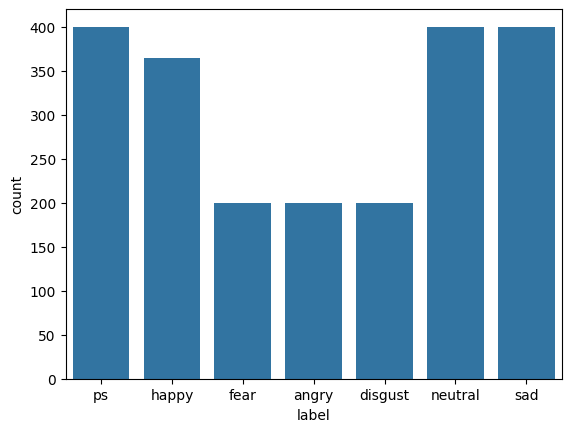

In [9]:
sns.countplot(data=df, x='label')

In [10]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

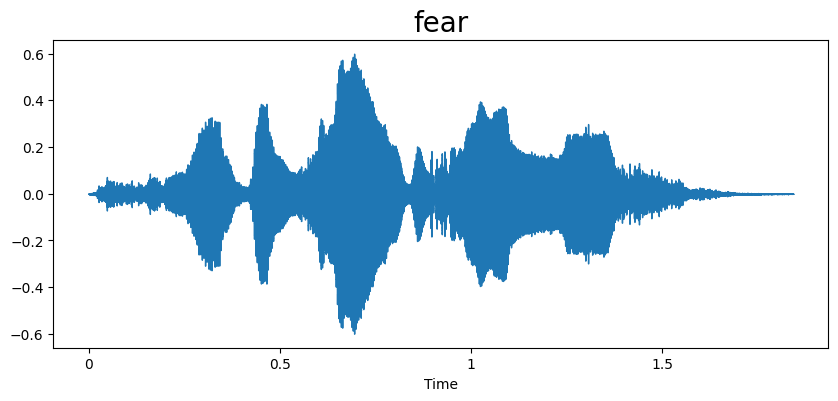

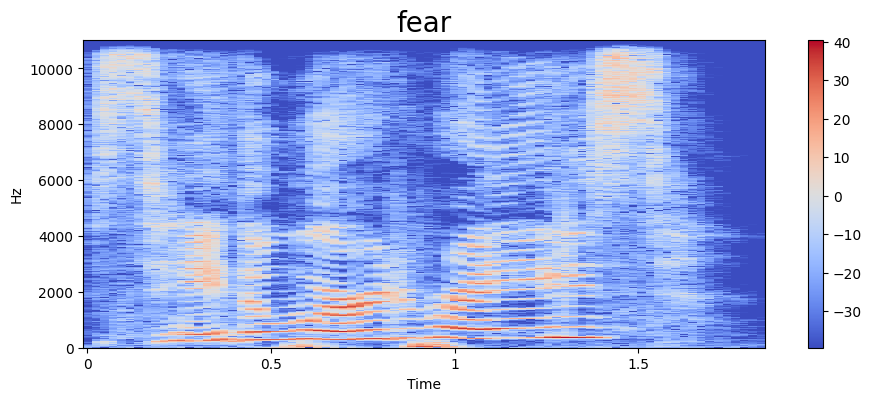

In [11]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

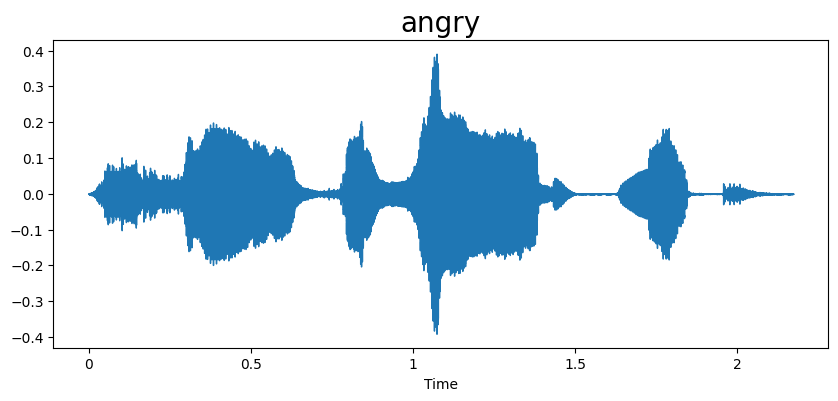

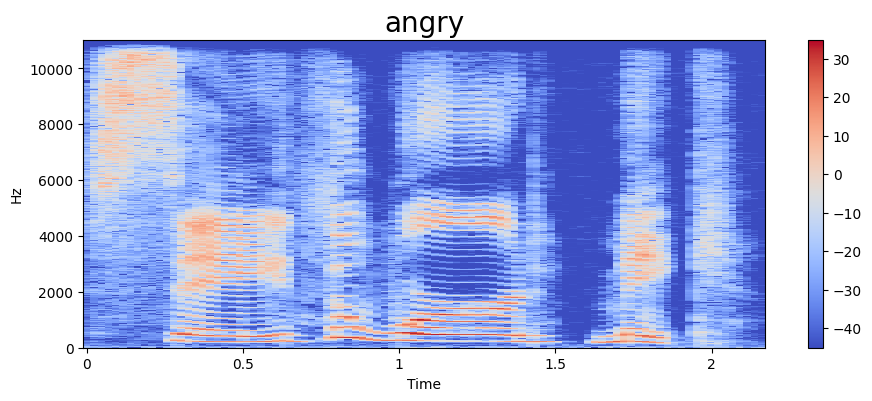

In [12]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

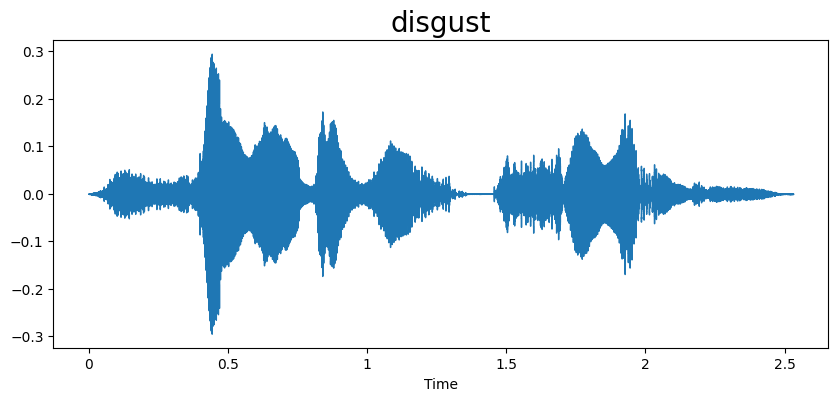

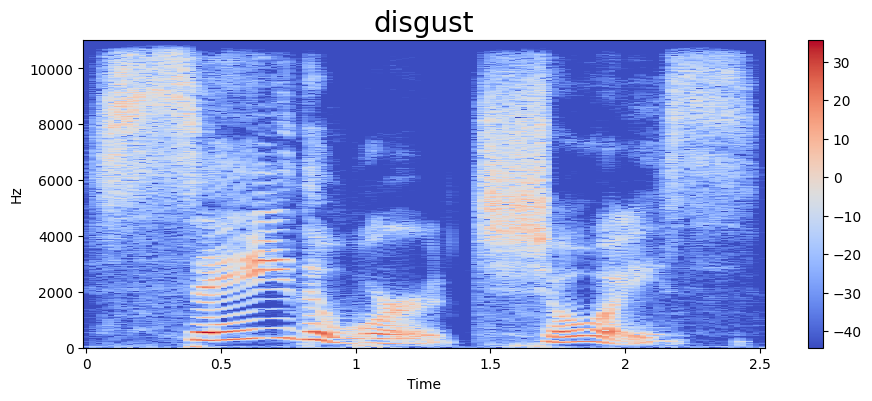

In [13]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

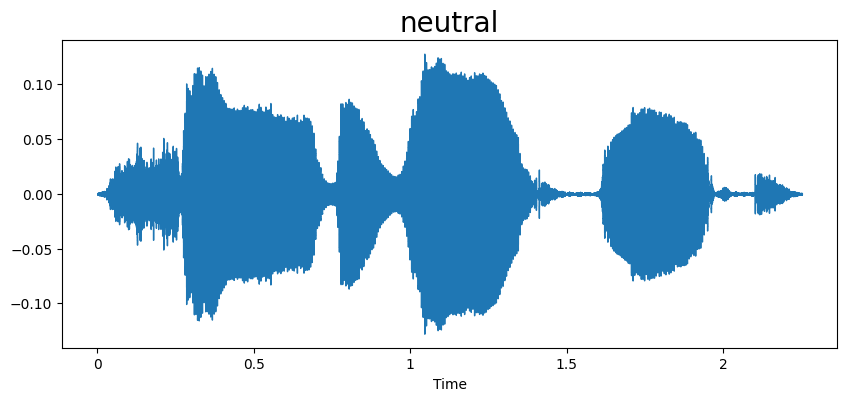

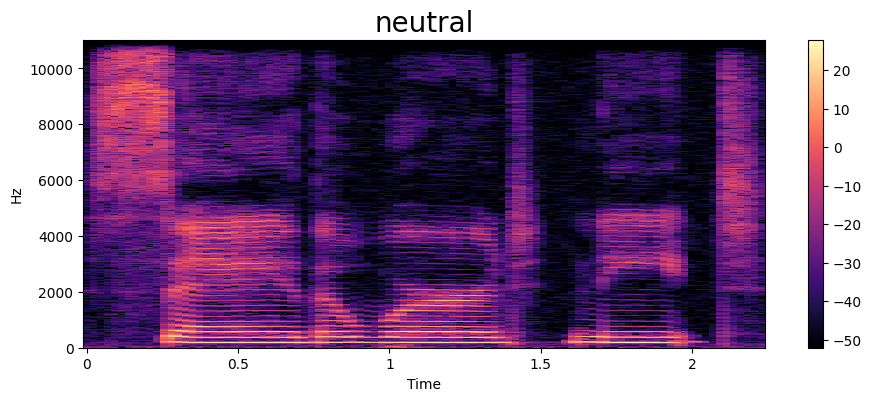

In [14]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

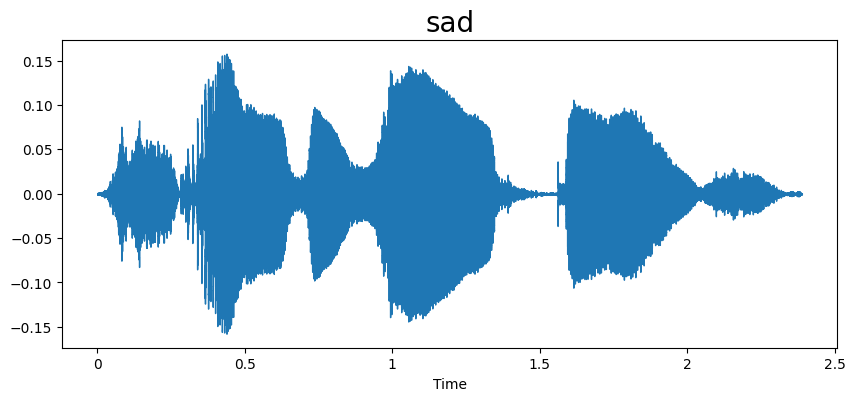

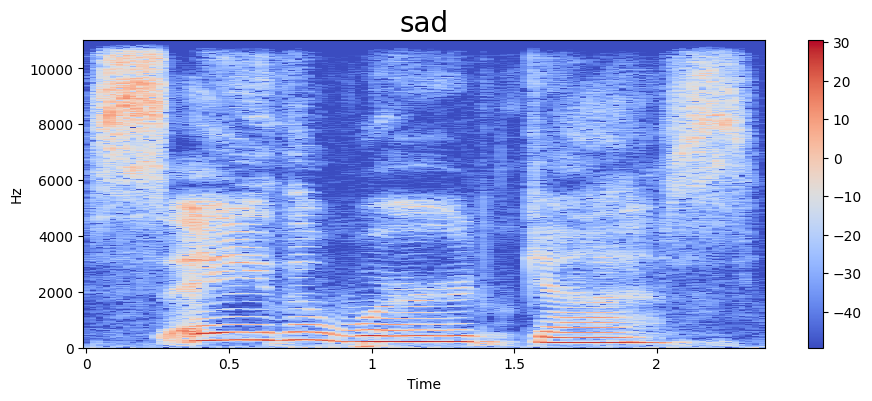

In [15]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

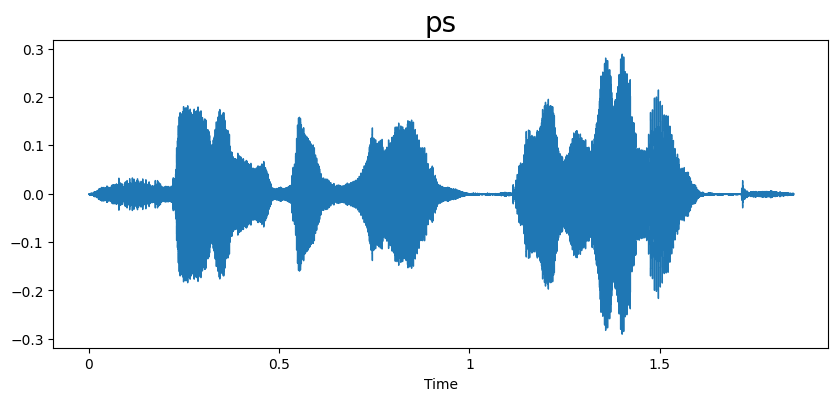

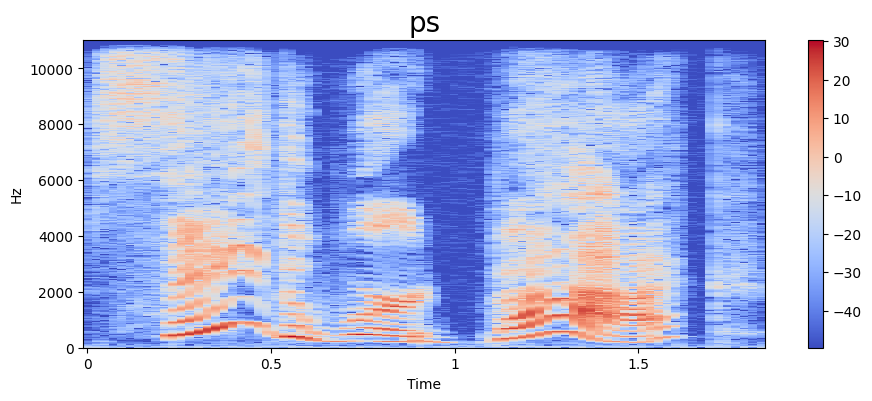

In [16]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

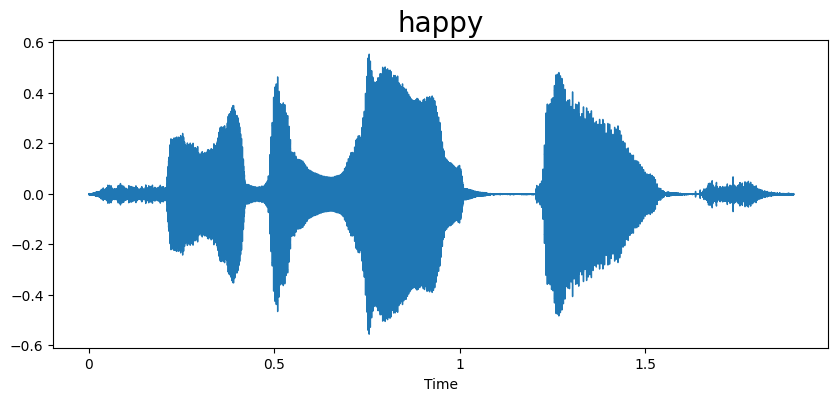

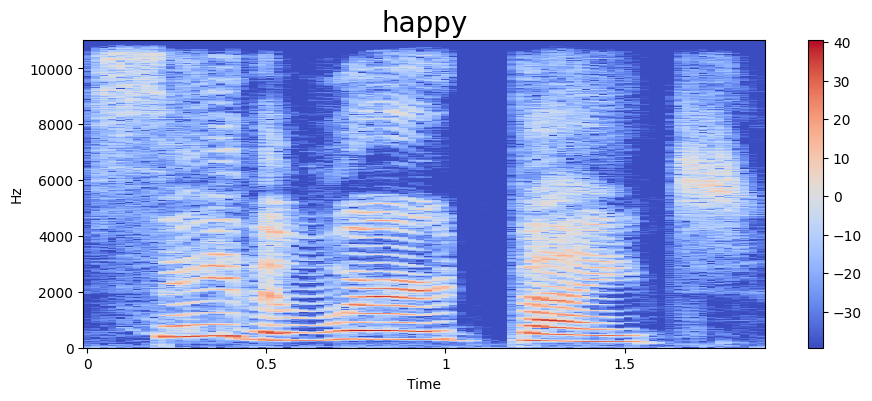

In [17]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [18]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [19]:
extract_mfcc(df['speech'][0])

array([-3.4234851e+02,  6.9852608e+01, -3.4216610e+01, -7.0165615e+00,
       -1.0650551e+01,  4.5483503e+00, -1.0395727e+01, -1.6107697e+01,
       -8.3884926e+00, -2.4352908e+00, -1.6415644e+01,  4.7987514e+00,
       -3.8900917e+00,  9.7831297e+00, -2.8975823e+00, -8.9874279e-01,
        6.1882567e-01,  6.8051491e+00, -6.1754808e-02,  4.9427199e+00,
        2.9417846e+00, -7.2508007e-01, -2.3252926e+00,  2.7339323e+00,
       -2.5731611e+00,  2.6457913e+00,  3.2634893e-01,  4.4045720e+00,
        4.7917862e+00,  6.0677137e+00,  3.9370909e+00,  9.5074625e+00,
        1.8503407e+00,  1.0553004e+01,  5.4229150e+00,  8.5866957e+00,
        3.8180830e+00,  4.6217775e+00,  2.5727823e+00,  3.7583408e+00],
      dtype=float32)

In [20]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [29]:
X_mfcc

0       [-342.3485, 69.85261, -34.21661, -7.0165615, -...
1       [-389.8703, 94.92119, -6.0177207, -5.5790243, ...
2       [-359.0418, 28.117107, -11.621959, 17.04148, -...
3       [-322.68225, 38.802914, -15.675195, 9.412435, ...
4       [-384.38004, 31.405188, -10.559107, 21.58392, ...
                              ...                        
2160    [-499.69968, 69.37665, 22.5701, 1.9734275, 13....
2161    [-505.9471, 71.733154, 15.318556, 15.384199, 1...
2162    [-533.23004, 87.15153, 32.882744, 8.845728, 16...
2163    [-466.41122, 88.94412, 15.932117, -2.582914, -...
2164    [-524.21716, 105.51363, 20.170925, -11.64623, ...
Name: speech, Length: 2165, dtype: object

In [30]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2165, 40)

In [31]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2165, 40, 1)

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [33]:
y = y.toarray()

In [34]:
y.shape

(2165, 7)

## Create the LSTM Model

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
          

In [36]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
28/28 [==============================] - 9s 212ms/step - loss: 1.3604 - accuracy: 0.4630 - val_loss: 2.4695 - val_accuracy: 0.4781
Epoch 2/50
28/28 [==============================] - 4s 142ms/step - loss: 0.4689 - accuracy: 0.8430 - val_loss: 2.8805 - val_accuracy: 0.6097
Epoch 3/50
28/28 [==============================] - 5s 164ms/step - loss: 0.2203 - accuracy: 0.9255 - val_loss: 3.8918 - val_accuracy: 0.6166
Epoch 4/50
28/28 [==============================] - 5s 188ms/step - loss: 0.1253 - accuracy: 0.9625 - val_loss: 4.0063 - val_accuracy: 0.6189
Epoch 5/50
28/28 [==============================] - 4s 154ms/step - loss: 0.0891 - accuracy: 0.9700 - val_loss: 3.8730 - val_accuracy: 0.6166
Epoch 6/50
28/28 [==============================] - 5s 179ms/step - loss: 0.0744 - accuracy: 0.9781 - val_loss: 4.4394 - val_accuracy: 0.6189
Epoch 7/50
28/28 [==============================] - 6s 206ms/step - loss: 0.1223 - accuracy: 0.9613 - val_loss: 3.9097 - val_accuracy: 0.6166
Epoch 

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

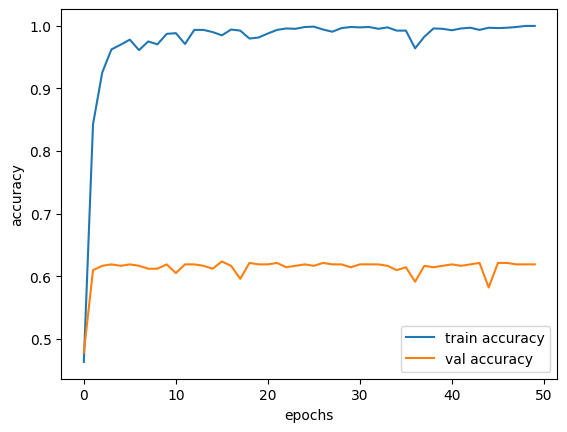

In [37]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

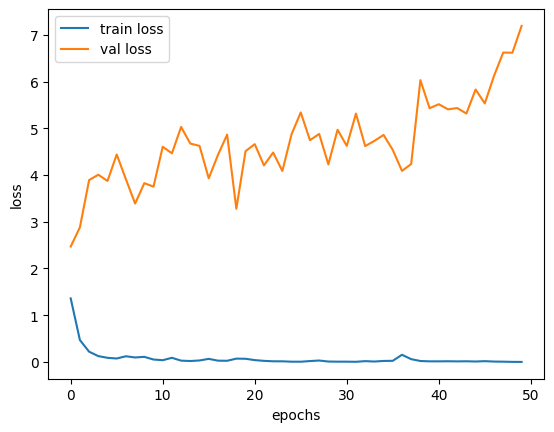

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()